In [25]:
import csv

csv_file_path = '../dataset/food-truck-data.csv'

with open(csv_file_path, 'r') as file:
    csv_reader = csv.reader(file)

    header = next(csv_reader)
    
    trucks = []
    for row in csv_reader:
        data = dict(zip(header, row))
        trucks.append(data)
        print(data["Applicant"], data["Latitude"], data["Longitude"])

Leo's Hot Dogs 37.76008693198698 -122.41880648110114
Ziaurehman Amini 37.794331003246846 -122.39581105302317
Casita Vegana 37.72188970870838 -122.4925212449949
Sunset Mercantile/Outer Sunset Farmers Market & Mercantile 37.74732654654123 -122.49628067270531
El Calamar Perubian Food Truck 37.788457028828915 -122.3998841605663
BOWL'D ACAI, LLC. 37.79357693326183 -122.40322987670133
BOWL'D ACAI, LLC. 37.78021548028814 -122.41602577015111
MOMO INNOVATION LLC 37.792870749741496 -122.4007474940767
MOMO INNOVATION LLC 37.792948952834664 -122.39809861316652
Buenafe 37.74574924062031 -122.3924814876784
MOMO INNOVATION LLC 37.78844615690132 -122.3986412420388
Buenafe 37.73944545286909 -122.39301498669842
MOMO INNOVATION LLC 37.79092150726921 -122.4001004237385
BOWL'D ACAI, LLC. 37.80457786909011 -122.43301077434302
HalalCartSF LLC 37.79094704192342 -122.39863358940373
BOWL'D ACAI, LLC. 37.79236678688307 -122.40014830676716
Philz Coffee Truck 37.79621549659414 -122.40375455824538
Philz Coffee Truc

In [26]:
! pip install pandas matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
#extract data from the csv file
food_trucks_df = pd.read_csv('../dataset/food-truck-data.csv')

In [29]:
food_trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   locationid                 481 non-null    int64  
 1   Applicant                  481 non-null    object 
 2   FacilityType               473 non-null    object 
 3   cnn                        481 non-null    int64  
 4   LocationDescription        463 non-null    object 
 5   Address                    481 non-null    object 
 6   blocklot                   471 non-null    object 
 7   block                      471 non-null    object 
 8   lot                        471 non-null    object 
 9   permit                     481 non-null    object 
 10  Status                     481 non-null    object 
 11  FoodItems                  475 non-null    object 
 12  X                          448 non-null    float64
 13  Y                          448 non-null    float64

In [30]:
food_trucks_df.head(10)

,locationid,Applicant,FacilityType,cnn,LocationDescription,Address,blocklot,block,lot,permit,...,Approved,Received,PriorPermit,ExpirationDate,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old)
0,1728067,Leo's Hot Dogs,Push Cart,9121000,MISSION ST: 19TH ST to 20TH ST (2300 - 2399),2301 MISSION ST,3595031,3595,031,23MFF-00008,...,09/20/2023 12:00:00 AM,20230920,1,11/15/2024 12:00:00 AM,"(37.76008693198698, -122.41880648110114)",2.0,4.0,7.0,28859.0,19.0
1,735318,Ziaurehman Amini,Push Cart,30727000,MARKET ST: DRUMM ST intersection,5 THE EMBARCADERO,0234017,0234,017,15MFF-0159,...,NaN,20151231,0,03/15/2016 12:00:00 AM,"(37.794331003246846, -122.39581105302317)",4.0,1.0,10.0,28855.0,6.0
2,1722089,Casita Vegana,Truck,7553000,JOHN MUIR DR: LAKE MERCED BLVD to SKYLINE BLVD...,Assessors Block 7283/Lot004,7283004,7283,004,23MFF-00005,...,08/30/2023 12:00:00 AM,20230829,0,11/15/2024 12:00:00 AM,"(37.72188970870838, -122.4925212449949)",1.0,8.0,4.0,64.0,14.0
3,1612654,Sunset Mercantile/Outer Sunset Farmers Market ...,Truck,1835000,37TH AVE: QUINTARA ST to RIVERA ST (2100 - 2199),2155 37TH AVE,2094006,2094,006,22MFF-00031,...,NaN,20220421,0,11/15/2022 12:00:00 AM,"(37.74732654654123, -122.49628067270531)",1.0,8.0,3.0,29491.0,35.0
4,1721249,El Calamar Perubian Food Truck,Truck,9091000,MISSION ST: ANTHONY ST to 02ND ST (573 - 599),85 02ND ST,3708019,3708,019,23MFF-00004,...,08/31/2023 12:00:00 AM,20230825,0,11/15/2024 12:00:00 AM,"(37.788457028828915, -122.3998841605663)",12.0,2.0,9.0,28855.0,6.0
5,1744305,"BOWL'D ACAI, LLC.",Truck,9301000,MONTGOMERY ST: CALIFORNIA ST to SACRAMENTO ST ...,451 MONTGOMERY ST,0240001,0240,001,23MFF-00049,...,NaN,20231121,0,11/15/2024 12:00:00 AM,"(37.79357693326183, -122.40322987670133)",4.0,1.0,10.0,28854.0,6.0
6,1744303,"BOWL'D ACAI, LLC.",Truck,8122000,LARKIN ST: FULTON ST to MCALLISTER ST (200 - 299),200 LARKIN ST,0353001,0353,001,23MFF-00048,...,NaN,20231121,0,11/15/2024 12:00:00 AM,"(37.78021548028814, -122.41602577015111)",7.0,10.0,9.0,28852.0,36.0
7,1733728,MOMO INNOVATION LLC,Truck,3527000,CALIFORNIA ST: BATTERY ST to SANSOME ST (300 -...,351 CALIFORNIA ST,0261010A,0261,010A,23MFF-00027,...,10/18/2023 12:00:00 AM,20231016,0,11/15/2024 12:00:00 AM,"(37.792870749741496, -122.4007474940767)",4.0,1.0,10.0,28854.0,6.0
8,1733788,MOMO INNOVATION LLC,Truck,3525000,CALIFORNIA ST: DAVIS ST to FRONT ST (100 - 199),101 CALIFORNIA ST,0263011,0263,011,23MFF-00029,...,10/18/2023 12:00:00 AM,20231017,0,11/15/2024 12:00:00 AM,"(37.792948952834664, -122.39809861316652)",4.0,1.0,10.0,28860.0,6.0
9,1733610,Buenafe,Truck,10927000,RANKIN ST: DAVIDSON AVE to EVANS AVE (200 - 299),220 RANKIN ST,5228001,5228,001,23MFF-00025,...,10/18/2023 12:00:00 AM,20231013,0,11/15/2024 12:00:00 AM,"(37.74574924062031, -122.3924814876784)",10.0,3.0,8.0,58.0,1.0


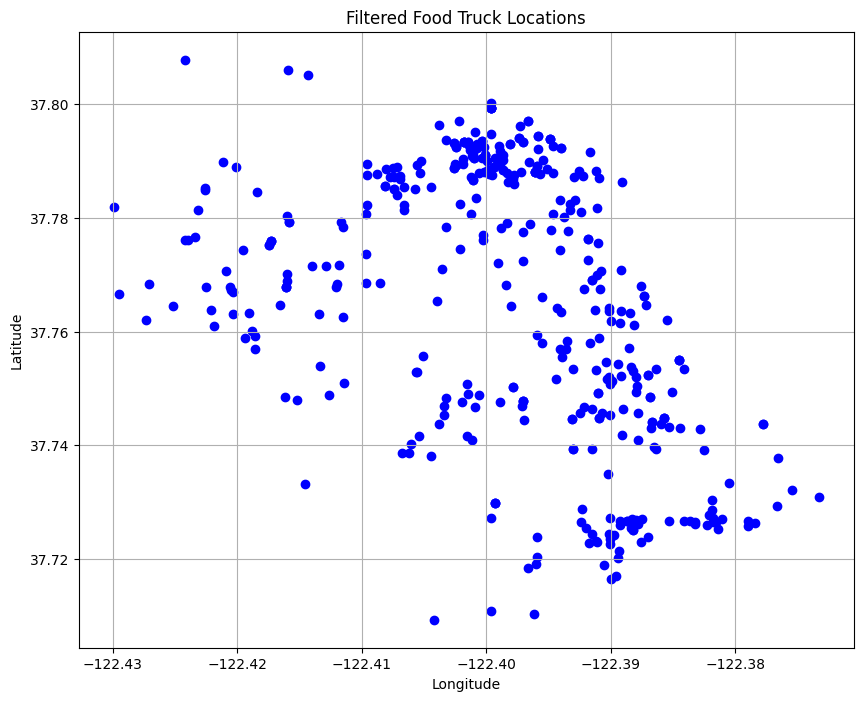

In [31]:
#Visualizing raw data, filtering the one outlier found in the csv file
Q1_lat = food_trucks_df['Latitude'].quantile(0.25)
Q3_lat = food_trucks_df['Latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

Q1_lon = food_trucks_df['Longitude'].quantile(0.25)
Q3_lon = food_trucks_df['Longitude'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon

threshold_lat = 1.5 * IQR_lat
threshold_lon = 1.5 * IQR_lon

filtered_data = food_trucks_df[
    (food_trucks_df['Latitude'] >= (Q1_lat - threshold_lat)) &
    (food_trucks_df['Latitude'] <= (Q3_lat + threshold_lat)) &
    (food_trucks_df['Longitude'] >= (Q1_lon - threshold_lon)) &
    (food_trucks_df['Longitude'] <= (Q3_lon + threshold_lon))
]

plt.figure(figsize=(10, 8))
plt.scatter(filtered_data['Longitude'], filtered_data['Latitude'], marker='o', color='blue')
plt.title('Filtered Food Truck Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [32]:
coordinates = food_trucks_df[['Latitude', 'Longitude']]

In [33]:
scaler = StandardScaler()
coordinates_scaled = scaler.fit_transform(coordinates)

In [34]:
kmeans = KMeans(n_clusters=10)
food_trucks_df['cluster'] = kmeans.fit_predict(coordinates_scaled)

In [35]:
food_trucks_df.head(10)

,locationid,Applicant,FacilityType,cnn,LocationDescription,Address,blocklot,block,lot,permit,...,Received,PriorPermit,ExpirationDate,Location,Fire Prevention Districts,Police Districts,Supervisor Districts,Zip Codes,Neighborhoods (old),cluster
0,1728067,Leo's Hot Dogs,Push Cart,9121000,MISSION ST: 19TH ST to 20TH ST (2300 - 2399),2301 MISSION ST,3595031,3595,031,23MFF-00008,...,20230920,1,11/15/2024 12:00:00 AM,"(37.76008693198698, -122.41880648110114)",2.0,4.0,7.0,28859.0,19.0,4
1,735318,Ziaurehman Amini,Push Cart,30727000,MARKET ST: DRUMM ST intersection,5 THE EMBARCADERO,0234017,0234,017,15MFF-0159,...,20151231,0,03/15/2016 12:00:00 AM,"(37.794331003246846, -122.39581105302317)",4.0,1.0,10.0,28855.0,6.0,2
2,1722089,Casita Vegana,Truck,7553000,JOHN MUIR DR: LAKE MERCED BLVD to SKYLINE BLVD...,Assessors Block 7283/Lot004,7283004,7283,004,23MFF-00005,...,20230829,0,11/15/2024 12:00:00 AM,"(37.72188970870838, -122.4925212449949)",1.0,8.0,4.0,64.0,14.0,7
3,1612654,Sunset Mercantile/Outer Sunset Farmers Market ...,Truck,1835000,37TH AVE: QUINTARA ST to RIVERA ST (2100 - 2199),2155 37TH AVE,2094006,2094,006,22MFF-00031,...,20220421,0,11/15/2022 12:00:00 AM,"(37.74732654654123, -122.49628067270531)",1.0,8.0,3.0,29491.0,35.0,5
4,1721249,El Calamar Perubian Food Truck,Truck,9091000,MISSION ST: ANTHONY ST to 02ND ST (573 - 599),85 02ND ST,3708019,3708,019,23MFF-00004,...,20230825,0,11/15/2024 12:00:00 AM,"(37.788457028828915, -122.3998841605663)",12.0,2.0,9.0,28855.0,6.0,2
5,1744305,"BOWL'D ACAI, LLC.",Truck,9301000,MONTGOMERY ST: CALIFORNIA ST to SACRAMENTO ST ...,451 MONTGOMERY ST,0240001,0240,001,23MFF-00049,...,20231121,0,11/15/2024 12:00:00 AM,"(37.79357693326183, -122.40322987670133)",4.0,1.0,10.0,28854.0,6.0,2
6,1744303,"BOWL'D ACAI, LLC.",Truck,8122000,LARKIN ST: FULTON ST to MCALLISTER ST (200 - 299),200 LARKIN ST,0353001,0353,001,23MFF-00048,...,20231121,0,11/15/2024 12:00:00 AM,"(37.78021548028814, -122.41602577015111)",7.0,10.0,9.0,28852.0,36.0,6
7,1733728,MOMO INNOVATION LLC,Truck,3527000,CALIFORNIA ST: BATTERY ST to SANSOME ST (300 -...,351 CALIFORNIA ST,0261010A,0261,010A,23MFF-00027,...,20231016,0,11/15/2024 12:00:00 AM,"(37.792870749741496, -122.4007474940767)",4.0,1.0,10.0,28854.0,6.0,2
8,1733788,MOMO INNOVATION LLC,Truck,3525000,CALIFORNIA ST: DAVIS ST to FRONT ST (100 - 199),101 CALIFORNIA ST,0263011,0263,011,23MFF-00029,...,20231017,0,11/15/2024 12:00:00 AM,"(37.792948952834664, -122.39809861316652)",4.0,1.0,10.0,28860.0,6.0,2
9,1733610,Buenafe,Truck,10927000,RANKIN ST: DAVIDSON AVE to EVANS AVE (200 - 299),220 RANKIN ST,5228001,5228,001,23MFF-00025,...,20231013,0,11/15/2024 12:00:00 AM,"(37.74574924062031, -122.3924814876784)",10.0,3.0,8.0,58.0,1.0,9


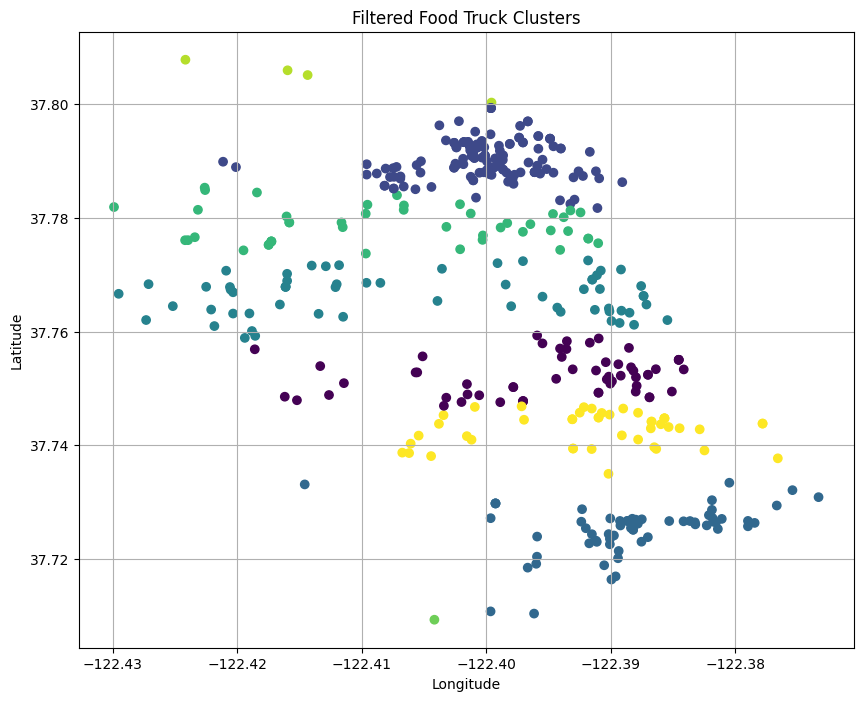

In [36]:
Q1_lat = food_trucks_df['Latitude'].quantile(0.25)
Q3_lat = food_trucks_df['Latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat

Q1_lon = food_trucks_df['Longitude'].quantile(0.25)
Q3_lon = food_trucks_df['Longitude'].quantile(0.75)
IQR_lon = Q3_lon - Q1_lon

# Define threshold for outliers
threshold_lat = 1.5 * IQR_lat
threshold_lon = 1.5 * IQR_lon

# Filter data outside the threshold
filtered_data = food_trucks_df[
    (food_trucks_df['Latitude'] >= (Q1_lat - threshold_lat)) &
    (food_trucks_df['Latitude'] <= (Q3_lat + threshold_lat)) &
    (food_trucks_df['Longitude'] >= (Q1_lon - threshold_lon)) &
    (food_trucks_df['Longitude'] <= (Q3_lon + threshold_lon))
]

# Plot the filtered cluster representation
plt.figure(figsize=(10, 8))
plt.scatter(filtered_data['Longitude'], filtered_data['Latitude'], c=filtered_data['cluster'], cmap='viridis', marker='o')
plt.title('Filtered Food Truck Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [37]:
def get_cluster(latitude, longitude):
    # Standardize the input coordinates using the same scaler
    input_coords_scaled = scaler.transform([[latitude, longitude]])

    # Predict the cluster for the input coordinates
    cluster = kmeans.predict(input_coords_scaled)[0]

    return cluster

In [38]:
input_latitude = 37.7749
input_longitude = -102.4194

result_cluster = get_cluster(input_latitude, input_longitude)
print(f"The truck belongs to Cluster {result_cluster}")

The truck belongs to Cluster 3


/home/jack/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [39]:
input_latitude = 37.7749
input_longitude = -162.4194

result_cluster = get_cluster(input_latitude, input_longitude)
print(f"The truck belongs to Cluster {result_cluster}")

The truck belongs to Cluster 5


/home/jack/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [40]:
food_trucks_df.to_csv('../dataset/processed/clustered-food-truck-data.csv', index=False)